<a href="https://colab.research.google.com/github/camilamurillo1/Regresion-Lineal/blob/main/Actividad6_1_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Camila Murillo - A00828860

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving mexicoNulos.csv to mexicoNulos.csv


In [246]:
df= pd.read_csv("mexicoNulos.csv")
df=df.drop(["Unnamed: 0"], axis=1)
df

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
1,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
2,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.92,4.92,4.58,4.71,0.0,1.0,1.0,0.0,0.0,0.31
4,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,2022-11-16,...,5.00,5.00,5.00,5.00,0.0,2.0,2.0,0.0,0.0,1.00
24222,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,2023-03-24,...,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,1.00
24223,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,2017-10-15,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24224,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,2013-07-29,...,5.00,5.00,5.00,5.00,0.0,13.0,13.0,0.0,0.0,1.00


In [247]:
filtro1=df["room_type"]=="Private room"
p=df[filtro1]
p

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7,https://www.airbnb.com/rooms/61792,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,https://www.airbnb.com/users/show/299558,Roberto,2010-11-26,...,4.92,4.95,4.94,4.87,0.0,2.0,0.0,2.0,0.0,0.94
16,https://www.airbnb.com/rooms/760912,2023-03-30,city scrape,"Stylish bachelor pad in La Roma, DF",<b>The space</b><br />If you are coming to Mex...,We are located in the most developed area of M...,https://a0.muscache.com/pictures/10580755/b2dc...,https://www.airbnb.com/users/show/3817743,Max,2012-10-09,...,5.00,4.60,4.80,4.60,0.0,1.0,0.0,1.0,0.0,0.04
17,https://www.airbnb.com/rooms/2088218,2023-03-30,city scrape,Private rooms near old Coyoacan center,Hello! I have 2 private rooms for rent in a ni...,"Es una zona residencial de Coyoacán, ubicada e...",https://a0.muscache.com/pictures/32395878/54f6...,https://www.airbnb.com/users/show/10659485,Cécile,2013-12-16,...,5.00,4.80,4.90,4.40,0.0,1.0,0.0,1.0,0.0,0.04
18,https://www.airbnb.com/rooms/2093036,2023-03-29,city scrape,Departamento 2 dormitorios x Antara,Departamento de 2 dormitorios y 1 banos comple...,El apartamento se encuentra en una zona reside...,https://a0.muscache.com/pictures/28553895/71d5...,https://www.airbnb.com/users/show/3083561,Federico,2012-07-28,...,5.00,4.80,4.90,4.40,0.0,1.0,0.0,1.0,0.0,0.04
21,https://www.airbnb.com/rooms/131610,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,Polanco is a great neighborhood to walk by.<br...,https://a0.muscache.com/pictures/837085/b9ed71...,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,...,4.96,4.96,4.89,4.68,0.0,3.0,1.0,2.0,0.0,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24202,https://www.airbnb.com/rooms/856473895554110501,2023-03-30,city scrape,506,""" THE BRIT "" es un edificio único en su clase ...",El área está llena de cosas que hacer y lugare...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/505303275,Ivan,2023-03-14,...,5.00,5.00,5.00,5.00,0.0,6.0,1.0,5.0,0.0,1.00
24215,https://www.airbnb.com/rooms/853707681690048732,2023-03-30,city scrape,Beautiful Sunny bedroom off Masaryk,This cozy and sunny bedroom is the perfect pla...,Polanco one of the safest and best neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506768013,Mohamed,2023-03-23,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24217,https://www.airbnb.com/rooms/853746847434924262,2023-03-29,city scrape,Room with great view & BR 1 block from Reforma,Private room in Penthouse located in the heart...,Many restaurant option as well as cafes and ba...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/68325043,Mariana,2016-04-22,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24220,https://www.airbnb.com/rooms/853922041242738127,2023-03-29,city scrape,"Excelente Ambiente 5570,835,621",Tu familia estará cerca de todo si te hospedas...,En el corazón de la Condesa,https://a0.muscache.com/pictures/d2e3ac33-c092...,https://www.airbnb.com/users/show/506810572,Angel,2023-03-24,...,5.00,5.00,5.00,5.00,0.0,2.0,0.0,2.0,0.0,1.00


In [248]:
filtro2=df["room_type"]=="Hotel room"
l=df[filtro2]
l

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14,https://www.airbnb.com/rooms/737328,2023-03-29,city scrape,Business Suite BEIGE near Reforma,<b>The space</b><br />On your business or leis...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/10105792/ffaf...,https://www.airbnb.com/users/show/3850198,Hermann,2012-10-12,...,5.00,5.00,4.83,4.78,0.0,11.0,7.0,0.0,0.0,0.18
53,https://www.airbnb.com/rooms/865012,2023-03-29,city scrape,Business Suite RED near Reforma Av.,<b>The space</b><br />Beautiful business suite...,San Ángel is a XVI century village nestled in ...,https://a0.muscache.com/pictures/12416374/df57...,https://www.airbnb.com/users/show/3850198,Hermann,2012-10-12,...,5.00,5.00,4.97,4.97,0.0,11.0,7.0,0.0,0.0,0.25
55,https://www.airbnb.com/rooms/868843,2023-03-30,city scrape,Business Suite PURPLE near Reforma,<b>The space</b><br />Beautiful business suite...,"The loft is in La Condesa, a neighborhood fill...",https://a0.muscache.com/pictures/12479457/a401...,https://www.airbnb.com/users/show/3850198,Hermann,2012-10-12,...,5.00,5.00,5.00,4.90,0.0,11.0,7.0,0.0,0.0,0.46
62,https://www.airbnb.com/rooms/869063,2023-03-30,city scrape,Business Suite BLACK near Reforma,Beautiful business suite facing our indoor pat...,We are located in the most developed area of M...,https://a0.muscache.com/pictures/12482950/80ec...,https://www.airbnb.com/users/show/3850198,Hermann,2012-10-12,...,5.00,5.00,4.95,4.95,0.0,11.0,7.0,0.0,0.0,0.25
66,https://www.airbnb.com/rooms/281134,2023-03-30,city scrape,COOL PENT HOUSE APARTMENT @CONDESA,Amazing Pent House apartment in the heart fo C...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/5754595/e5ec9...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,5.00,5.00,5.00,4.86,0.0,12.0,3.0,2.0,0.0,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9497,https://www.airbnb.com/rooms/43205383,2023-03-30,city scrape,Emporio Ciudad de México,A recently renovated historic building with a ...,The location it is near downtown. A middle cl...,https://a0.muscache.com/pictures/6c22e4d1-2294...,https://www.airbnb.com/users/show/336118145,Hotel Emporio,2020-02-14,...,5.00,5.00,5.00,5.00,0.0,2.0,0.0,1.0,0.0,0.12
9539,https://www.airbnb.com/rooms/43247503,2023-03-30,city scrape,FlowSuites Polanco,"Departamento completo, a 10 minutos del aeropu...",El vecindario es tranquilo a 5 minutos caminad...,https://a0.muscache.com/pictures/3a86f189-ea18...,https://www.airbnb.com/users/show/318447028,FlowSuites Polanco,2019-12-17,...,4.97,4.92,4.89,4.83,0.0,1.0,0.0,0.0,0.0,1.10
9541,https://www.airbnb.com/rooms/43247525,2023-03-30,previous scrape,Krystal Grand Suites Insurgentes Ciudad De México,"AnAxAgoras 41, Loft con “AlmA de HogAr”. <br ...",Ubicado en una zona con todo los servicios bás...,https://a0.muscache.com/pictures/97db0266-3607...,https://www.airbnb.com/users/show/318980910,Krystal Grand Suites Insurgentes,2019-12-19,...,4.77,4.75,4.87,4.57,0.0,1.0,0.0,0.0,0.0,2.02
9546,https://www.airbnb.com/rooms/43247567,2023-03-30,city scrape,CHAYA B&B,NUEVO DEPARTAMENTO totalmente sanitizado con e...,"Barrio muy tranquilo e iluminado, a una cuadra...",https://a0.muscache.com/pictures/20760914-ba9e...,https://www.airbnb.com/users/show/319050749,CHAYA B&B,2019-12-19,...,4.92,4.88,4.65,4.65,0.0,1.0,0.0,0.0,0.0,0.80


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

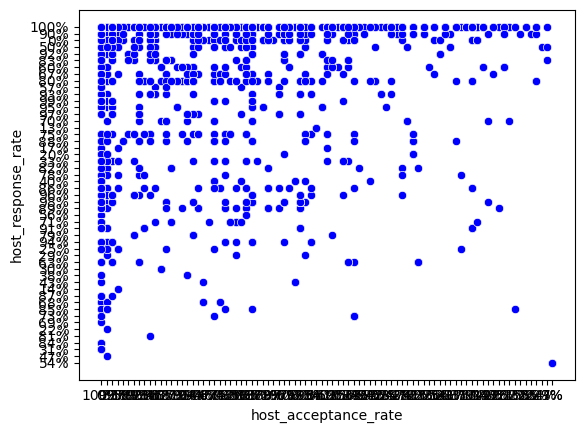

In [249]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=p)
#sns.scatterplot(X='host_acceptance_rate', y='host_response_rate', color="red", data=l)

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

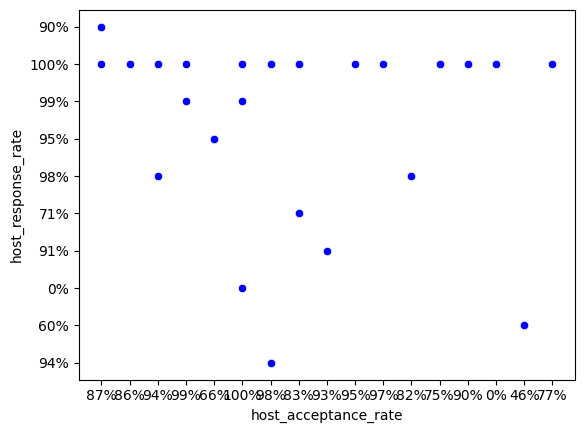

In [250]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

#sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=p)
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=l)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

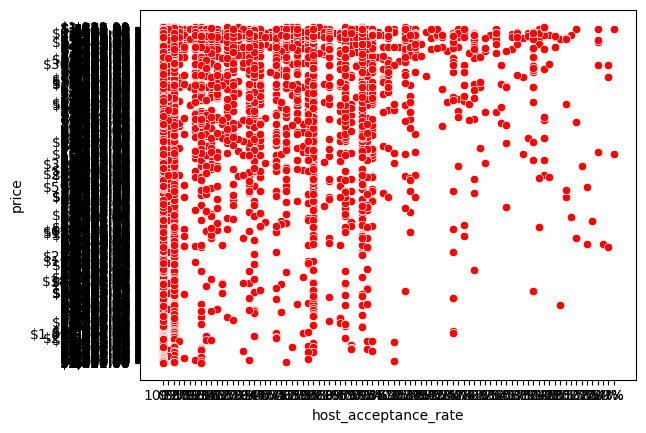

In [251]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=p)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

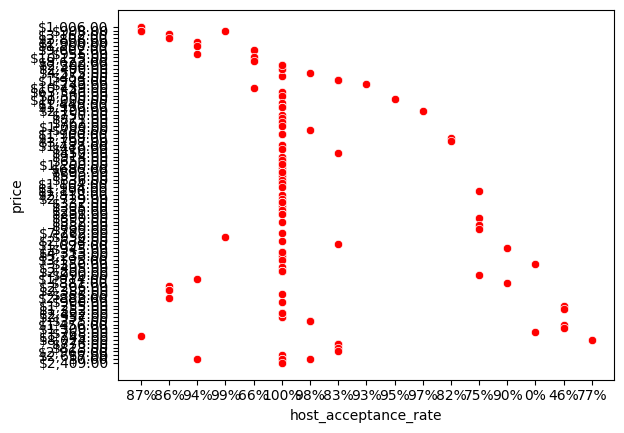

In [252]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=l)

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

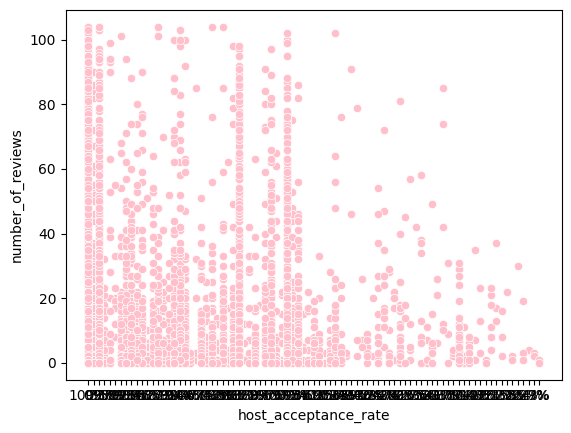

In [253]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=p)

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

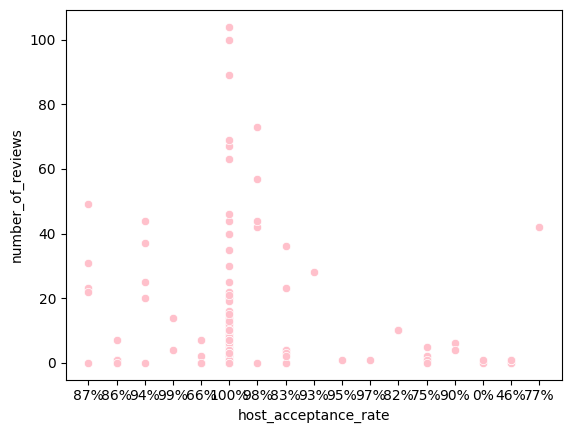

In [254]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="pink", data=l)

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

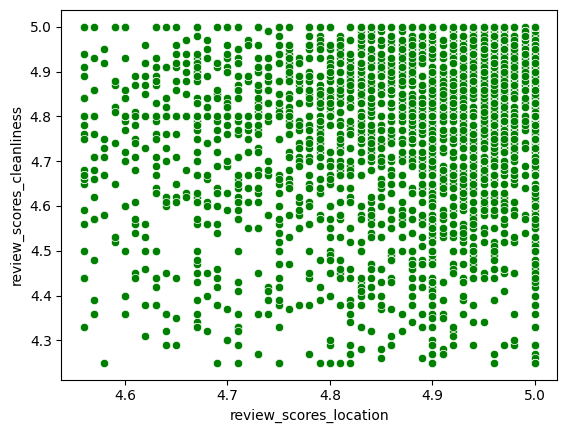

In [255]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="green", data=p)

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

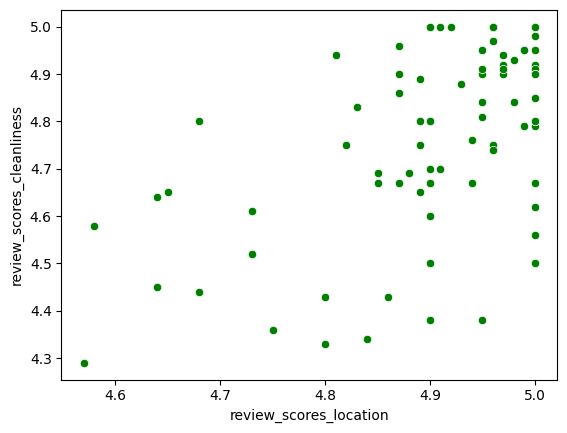

In [256]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="green", data=l)

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

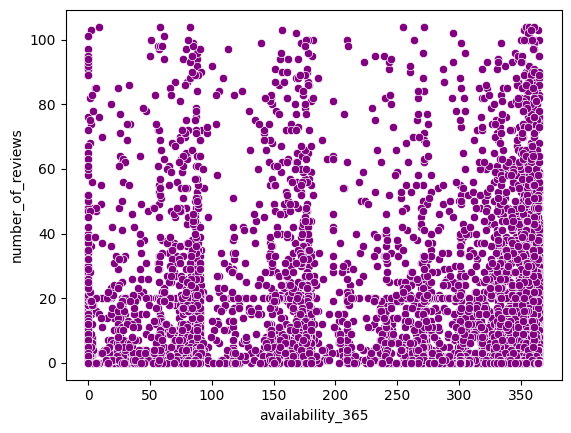

In [257]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews', color="purple", data=p)

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

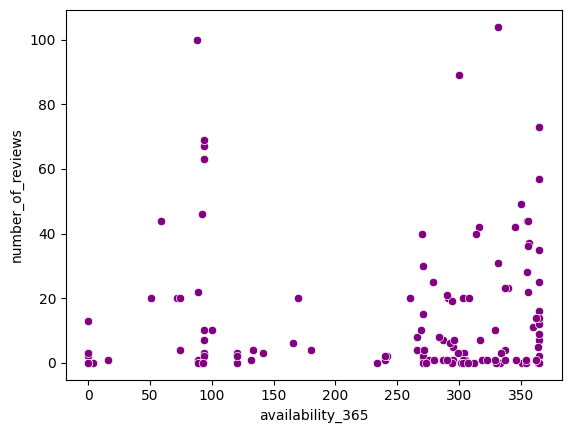

In [258]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='number_of_reviews', color="purple", data=l)

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

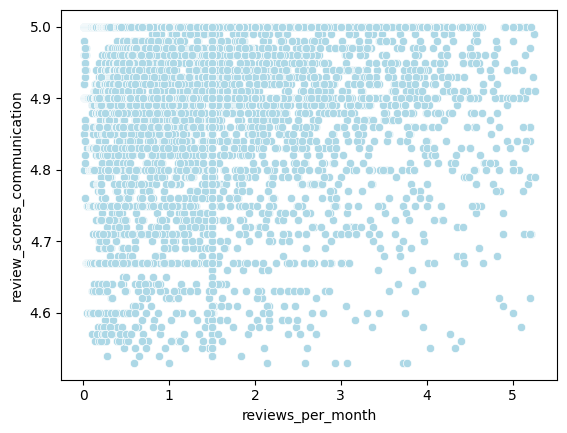

In [259]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="lightblue", data=p)

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

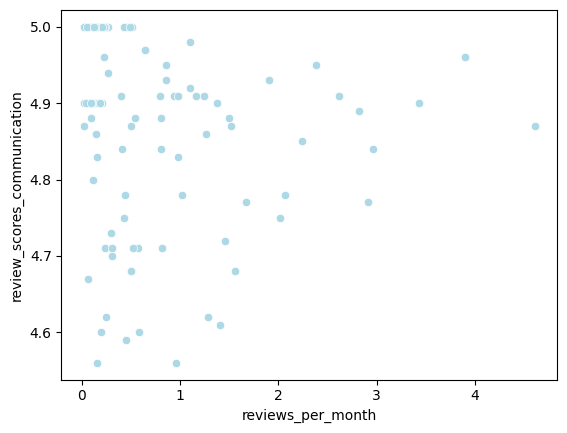

In [260]:
#Imprimimos el scatter plot entre la variable dependiente e independiente 
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="lightblue", data=l)

In [261]:
#df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float')
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace({"1 shared bath":0})
df['host_acceptance_rate'].value_counts()

100%    12653
99%      2940
98%      1126
0%        797
97%       784
        ...  
0           1
13%         1
9%          1
18%         1
30%         1
Name: host_acceptance_rate, Length: 92, dtype: int64

In [262]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace({"1 bath":0})
df['host_acceptance_rate'].value_counts()

100%    12653
99%      2940
98%      1126
0%        797
97%       784
        ...  
34%         2
9%          1
13%         1
18%         1
30%         1
Name: host_acceptance_rate, Length: 91, dtype: int64

In [263]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float')

In [264]:
df['host_response_rate'] = df['host_response_rate'].replace({"Entire home/apt":0})


In [265]:
df['host_response_rate'] = df['host_response_rate'].replace({"Private room":0})

In [266]:
df["host_response_rate"]= df['host_response_rate'].str.rstrip('%').astype('float')
#df["host_response_rate"].value_counts

In [267]:
df["host_response_rate"]=df["host_response_rate"].fillna(1)
df

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
1,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
2,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.92,4.92,4.58,4.71,0.0,1.0,1.0,0.0,0.0,0.31
4,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,2022-11-16,...,5.00,5.00,5.00,5.00,0.0,2.0,2.0,0.0,0.0,1.00
24222,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,2023-03-24,...,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,1.00
24223,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,2017-10-15,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24224,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,2013-07-29,...,5.00,5.00,5.00,5.00,0.0,13.0,13.0,0.0,0.0,1.00


In [268]:
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(1)
df

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
1,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
2,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,...,4.92,4.92,4.58,4.71,0.0,1.0,1.0,0.0,0.0,0.31
4,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,2022-11-16,...,5.00,5.00,5.00,5.00,0.0,2.0,2.0,0.0,0.0,1.00
24222,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,2023-03-24,...,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,1.00
24223,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,2017-10-15,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24224,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,2013-07-29,...,5.00,5.00,5.00,5.00,0.0,13.0,13.0,0.0,0.0,1.00


In [269]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]

Var_Dep= df['host_acceptance_rate']
Vars_Indep= df[['host_response_rate']]

In [270]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [271]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [272]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [273]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41625691]),
 'rank_': 1,
 'singular_': array([2858.15909522]),
 'intercept_': 51.95793178995284}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [274]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.13082610337930378

In [275]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['host_response_rate']]) #alcohol 
y_pred

array([93.58362243, 93.58362243, 93.58362243, ..., 93.58362243,
       93.58362243, 93.58362243])

In [276]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

,Predicciones,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,93.583622,https://www.airbnb.com/rooms/2056638,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,...,5.00,4.95,5.00,4.86,0.0,3.0,3.0,0.0,0.0,0.19
1,93.583622,https://www.airbnb.com/rooms/2072354,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,...,4.93,5.00,4.95,4.84,0.0,2.0,2.0,0.0,0.0,0.54
2,93.583622,https://www.airbnb.com/rooms/696037,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,...,4.92,4.92,4.58,4.71,0.0,3.0,3.0,0.0,0.0,0.31
3,93.583622,https://www.airbnb.com/rooms/35797,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,4.92,4.92,4.58,4.71,0.0,1.0,1.0,0.0,0.0,0.31
4,93.583622,https://www.airbnb.com/rooms/44616,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,"Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,...,4.87,4.78,4.98,4.48,0.0,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,93.583622,https://www.airbnb.com/rooms/853923589855678923,2023-03-30,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,...,5.00,5.00,5.00,5.00,0.0,2.0,2.0,0.0,0.0,1.00
24222,93.583622,https://www.airbnb.com/rooms/853966732274073000,2023-03-29,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,...,5.00,5.00,5.00,5.00,0.0,1.0,1.0,0.0,0.0,1.00
24223,93.583622,https://www.airbnb.com/rooms/854225071295768399,2023-03-29,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,En el corazón de la Condesa,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,...,5.00,5.00,5.00,5.00,0.0,1.0,0.0,1.0,0.0,1.00
24224,93.583622,https://www.airbnb.com/rooms/854247693069190865,2023-03-30,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,En el corazón de la Condesa,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/7799414,Tiane,...,5.00,5.00,5.00,5.00,0.0,13.0,13.0,0.0,0.0,1.00


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

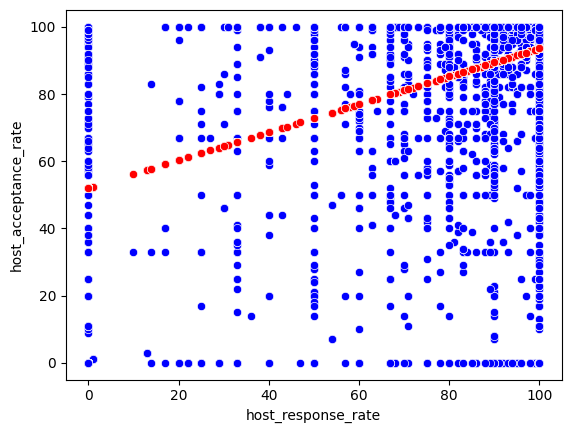

In [277]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=df)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [278]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.13082610337930378

In [279]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.361698912604536

Segunda variable: host_acceptance_rate vs price

In [280]:
p["price"] = p["price"].str.replace(',','')
p["price"]= p["price"].str.lstrip('$').astype('float')

<ipython-input-280-1cd4d503976f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["price"] = p["price"].str.replace(',','')
<ipython-input-280-1cd4d503976f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p["price"]= p["price"].str.lstrip('$').astype('float')


In [281]:
p['host_acceptance_rate']=  p['host_acceptance_rate'].str.rstrip('%').astype('float')

<ipython-input-281-b3b7bfabd4d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['host_acceptance_rate']=  p['host_acceptance_rate'].str.rstrip('%').astype('float')


In [282]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]

Var_Dep= p['host_acceptance_rate']
Vars_Indep= p[['price']]

In [283]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [284]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [285]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [286]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-4.58252786e-06]),
 'rank_': 1,
 'singular_': array([2160830.20317988]),
 'intercept_': 87.36467280534842}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [287]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

1.8359290937075556e-05

In [292]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=p[['price']])
y_pred

array([87.35968243, 87.36134589, 87.36295436, ..., 87.36192329,
       87.36352259, 87.36223032])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones', y_pred)
p

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

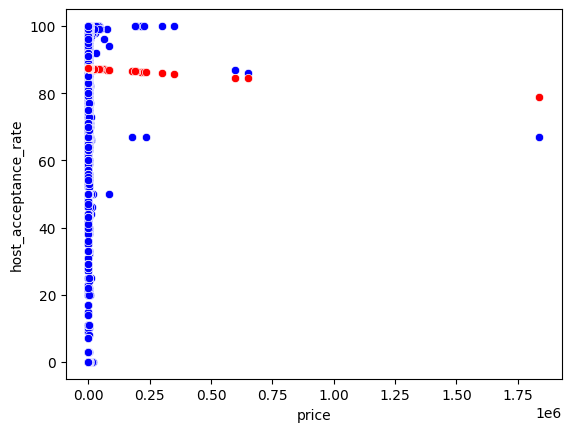

In [295]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=p)
sns.scatterplot(x='price', y='Predicciones', color="red", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [296]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

1.8359290937075556e-05

In [297]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.004284774315769216

Segunda L

In [298]:
l["price"] = l["price"].str.replace(',','')
l["price"]= l["price"].str.lstrip('$').astype('float')

<ipython-input-298-53bc80209802>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["price"] = l["price"].str.replace(',','')
<ipython-input-298-53bc80209802>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l["price"]= l["price"].str.lstrip('$').astype('float')


In [299]:
l['host_acceptance_rate']=  l['host_acceptance_rate'].str.rstrip('%').astype('float')

<ipython-input-299-b9195d1a3b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l['host_acceptance_rate']=  l['host_acceptance_rate'].str.rstrip('%').astype('float')


In [300]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]

Var_Dep= l['host_acceptance_rate']
Vars_Indep= l[['price']]

In [301]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [302]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [303]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [304]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.77622222e-06]),
 'rank_': 1,
 'singular_': array([65531.08068275]),
 'intercept_': 91.26319178780767}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [305]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

7.239885347343211e-06

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=l[['price']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones', y_pred)
l

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

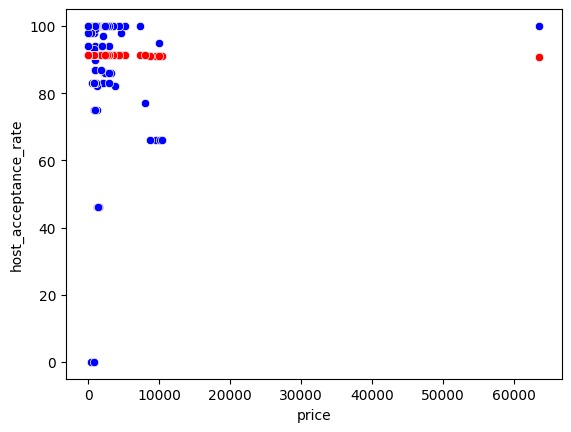

In [308]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='price', y='host_acceptance_rate', color="blue", data=l)
sns.scatterplot(x='price', y='Predicciones', color="red", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [309]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

7.239885347343211e-06

In [310]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0026907035041682337

##Tercera variable: host_acceptance_rate vs number_of_reviews

In [311]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= p['host_acceptance_rate']
Vars_Indep= p[['number_of_reviews']] #alcohol

In [312]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [313]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [314]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [315]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.18782675]),
 'rank_': 1,
 'singular_': array([1916.46644273]),
 'intercept_': 84.53380977206498}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [316]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02426172728555709

In [317]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=p[['number_of_reviews']])
y_pred

array([96.17906825, 85.47294352, 85.47294352, ..., 84.53380977,
       84.53380977, 84.53380977])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones3', y_pred)
p

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

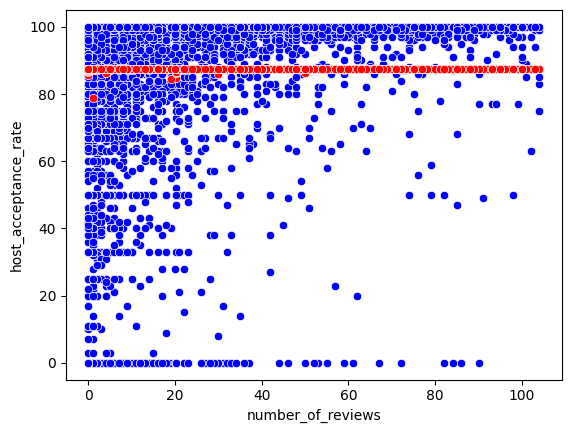

In [321]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=p)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [322]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.02426172728555709

In [323]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1557617645173458

Tercera L 

In [324]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= l['host_acceptance_rate']
Vars_Indep= l[['number_of_reviews']] #alcohol

In [325]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [326]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [327]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [328]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.17052553]),
 'rank_': 1,
 'singular_': array([238.51357016]),
 'intercept_': 88.74770818229943}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [329]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04612163487030818

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=l[['number_of_reviews']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones3', y_pred)
l

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

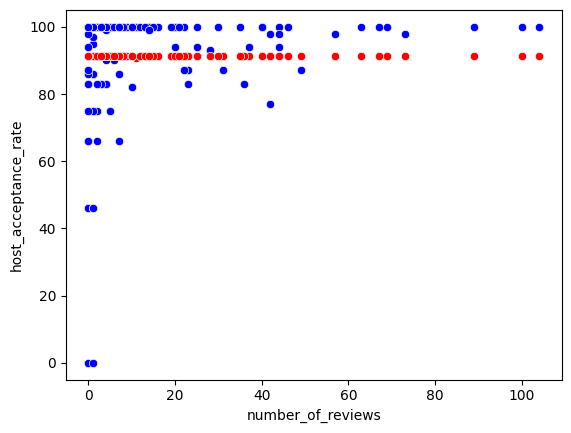

In [332]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=l)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [333]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04612163487030818

In [334]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2147594814444945

##Cuarta variable "review_scores_location vs review_scores_cleanliness"

In [335]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= p['review_scores_location']
Vars_Indep= p[['review_scores_cleanliness']] #alcohol

In [336]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [337]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [338]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [339]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.19815982]),
 'rank_': 1,
 'singular_': array([15.84017679]),
 'intercept_': 3.9600831005544483}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [340]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.11224510429529666

In [346]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=p[['review_scores_cleanliness']])
y_pred

array([4.93106622, 4.91125024, 4.87161828, ..., 4.9508822 , 4.9508822 ,
       4.9508822 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones5', y_pred)
p

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

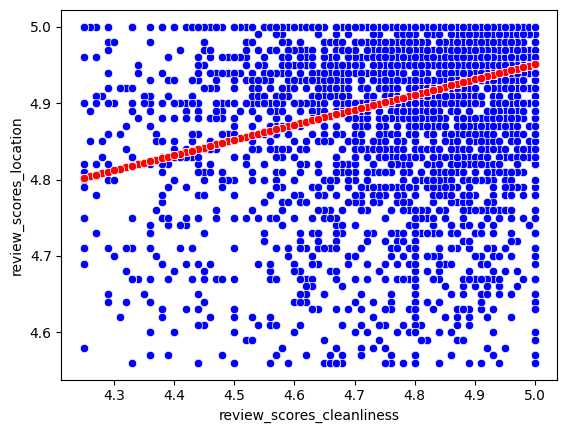

In [348]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=p)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones5', color="red", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [349]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.11224510429529666

In [350]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.33503000506715314

Cuarta L 

In [351]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= l['review_scores_location']
Vars_Indep= l[['review_scores_cleanliness']] #alcohol

In [352]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [353]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [354]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [355]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.33165437]),
 'rank_': 1,
 'singular_': array([2.20103734]),
 'intercept_': 3.3262117076396027}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [356]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.42498325007273163

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=l[['review_scores_cleanliness']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones5', y_pred)
l

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

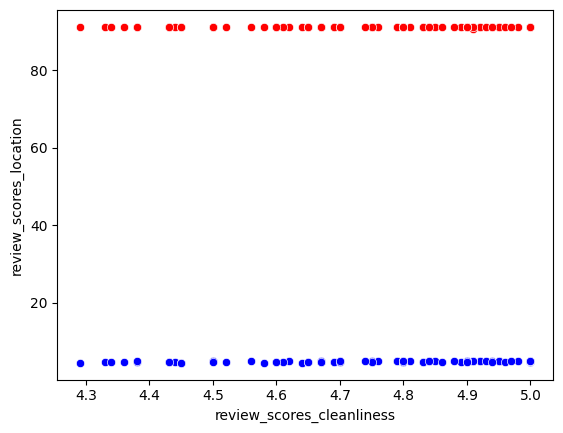

In [359]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_location', color="blue", data=l)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [360]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.42498325007273163

In [361]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6519073937859055

##Quinta Variable: “availability_365 vs number_of_reviews"

In [362]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= p['availability_365']
Vars_Indep= p[['number_of_reviews']] #alcohol

In [363]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [364]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [365]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [366]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.42562581]),
 'rank_': 1,
 'singular_': array([1916.46644273]),
 'intercept_': 259.4609301417107}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [367]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.005180477985288978

In [368]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=p[['number_of_reviews']])
y_pred

array([233.07212987, 257.33280109, 257.33280109, ..., 259.46093014,
       259.46093014, 259.46093014])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones6', y_pred)
p

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

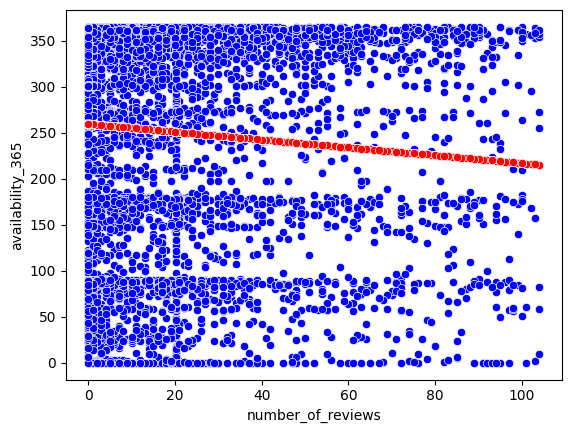

In [370]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=p)
sns.scatterplot(x='number_of_reviews', y='Predicciones6', color="red", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [371]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.005180477985288978

In [372]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.07197553740882369

Quinta L

In [373]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= l['availability_365']
Vars_Indep= l[['number_of_reviews']] #alcohol

In [374]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [375]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [376]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [377]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.29010875]),
 'rank_': 1,
 'singular_': array([238.51357016]),
 'intercept_': 242.2096835144323}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [378]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0027550703056403725

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=l[['number_of_reviews']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones6', y_pred)
l

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

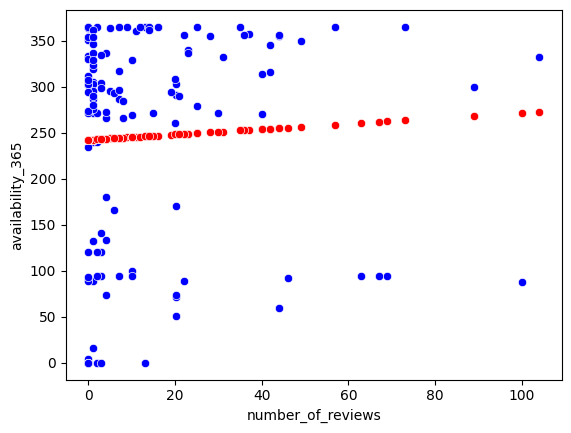

In [381]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='availability_365', color="blue", data=l)
sns.scatterplot(x='number_of_reviews', y='Predicciones6', color="red", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [382]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0027550703056403725

In [383]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0524887636131808

##Sexta Variable: “reviews_per_month vs review_scores_communication”

In [384]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= l['reviews_per_month']
Vars_Indep= l[['review_scores_communication']] #alcohol

In [385]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [386]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [387]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [388]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.46022026]),
 'rank_': 1,
 'singular_': array([1.36995316]),
 'intercept_': 7.801166960352425}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [389]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03871444056097317

In [390]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=p[['review_scores_communication']])
y_pred

array([0.57307665, 1.08415374, 0.79210969, ..., 0.50006564, 0.50006564,
       0.50006564])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
p.insert(0, 'Predicciones7', y_pred)
p

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=p)
sns.scatterplot(x='review_scores_communication', y='Predicciones7', color="red", data=p)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [393]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03871444056097317

In [394]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1967598550542594

Sexta L

In [395]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Var_Dep= l['reviews_per_month']
Vars_Indep= l[['review_scores_communication']] #alcohol

In [396]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [397]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [398]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [399]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.46022026]),
 'rank_': 1,
 'singular_': array([1.36995316]),
 'intercept_': 7.801166960352425}

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [400]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03871444056097317

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=l[['review_scores_communication']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
l.insert(0, 'Predicciones7', y_pred)
l

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

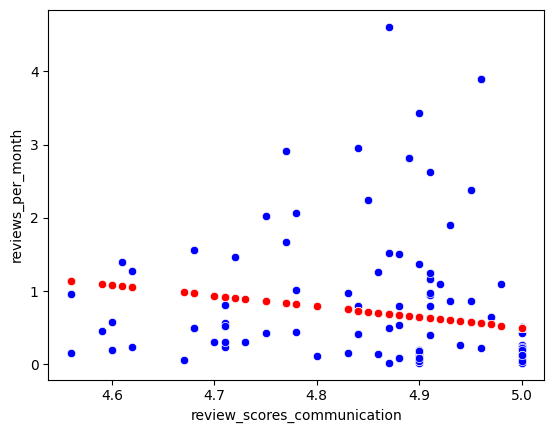

In [404]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_communication', y='reviews_per_month', color="blue", data=l)
sns.scatterplot(x='review_scores_communication', y='Predicciones7', color="red", data=l)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [405]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.03871444056097317

In [406]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1967598550542594

In [407]:
df.to_csv("nulosMexicoRegresion.csv")

from google.colab import files 

files.download("nulosMexicoRegresion.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

xx

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

In [ ]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

In [ ]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map